In [1]:
# Read dataset_summary.csv into a pandas DataFrame
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def read_csv_file(file_name: str) -> pd.DataFrame:
    csv_path = Path(__file__).with_name(file_name) if '__file__' in globals() else Path(file_name)
    print(f"Trying to read: {csv_path.resolve()}")
    df = pd.read_csv(csv_path)
    print('DataFrame shape:', df.shape)
    return df

In [6]:
df = read_csv_file('../dataset/syntax_error_user_patches_finetune_dataset.csv')

Trying to read: /home/diogenes/pylingual_colaboration/pylingual_download/code/dataset/syntax_error_user_patches_finetune_dataset.csv
DataFrame shape: (1152, 8)


In [7]:
df.head()

,file_hash,syntactic_error_word,syntactic_error_message,precessed_error_message,syntactic_error_description,error_line_number,old_code_full,new_code_full
0,1b071182ed192b46c3663a602507bca58c08890a1a6a0f...,SyntaxError,'{' was never closed,'{' was never closed,"File ""/decompiler_workspace/1b071182ed192b46c3...",68,local = os.getenv('LOCALAPPDATA')\n roa...,local = os.getenv('LOCALAPPDATA')\n roa...
1,11b1becb1c340a39803513371a438fe2568976dbaa1364...,SyntaxError,invalid syntax,invalid syntax,"File ""/decompiler_workspace/11b1becb1c340a3980...",101,checks += 1\n no_proxy = False\...,checks += 1\n no_proxy = False\...
2,e25c38320dba6e5c7979d9818b3d82ccc7f0c0938f5b1b...,SyntaxError,EOL while scanning string literal,eol while scanning string literal,"File ""/decompiler_workspace/e25c38320dba6e5c79...",33,"from colorama import Fore, Style, init\ninit()...","from colorama import Fore, Style, init\ninit()..."
3,3127c51d682432be364e4374ad2c5baacf8ff0c9935b2e...,SyntaxError,expected 'except' or 'finally' block,expected 'except' or 'finally' block,"File ""/decompiler_workspace/3127c51d682432be36...",74,"_, pid = win32process.GetWindowThreadProce...","_, pid = win32process.GetWindowThreadProce..."
4,37406cf3f9b0fb17f909d1a77c862541d8c9b1daacdae7...,IndentationError,unexpected indent,unexpected indent,Sorry: IndentationError: unexpected indent (in...,93,def load_targets(self):\n with open...,def load_targets(self):\n with open...


In [9]:
# Get summary statistics of numerical columns
df.describe()

,error_line_number
count,1152.000000
mean,147.290799
std,173.633585
min,6.000000
25%,47.000000
50%,74.000000
75%,218.000000
max,2183.000000


<Axes: xlabel='error_line_number'>

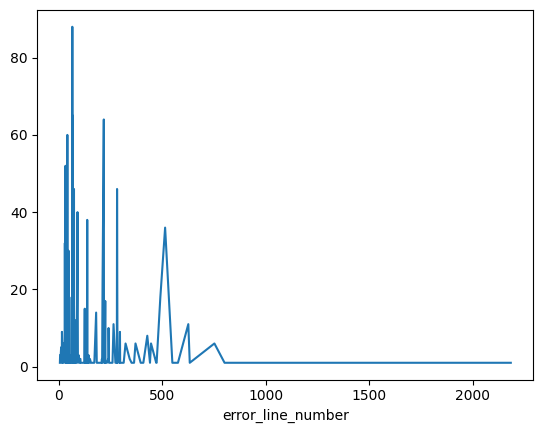

In [10]:
# Plot the frequency of errors by line number
df['error_line_number'].value_counts().sort_index().plot(kind='line')

<Axes: xlabel='syntactic_error_word'>

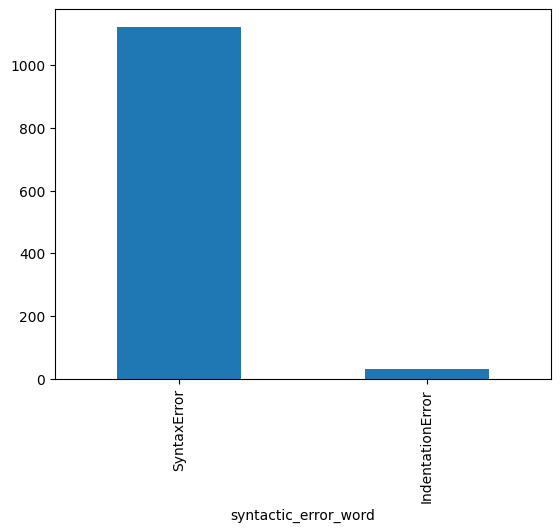

In [11]:
# Get the number of unique errors per type
df['syntactic_error_word'].value_counts().plot(kind='bar')

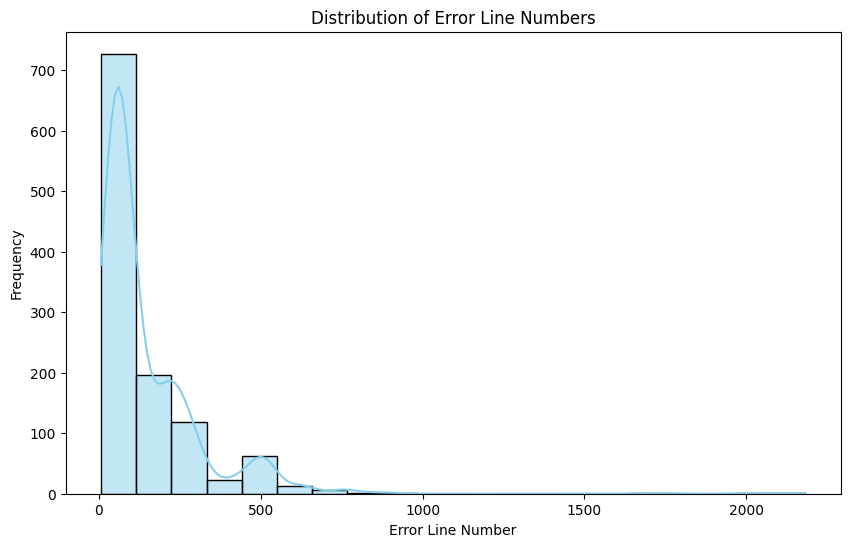

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of error line numbers
plt.figure(figsize=(10,6))
sns.histplot(df['error_line_number'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Error Line Numbers')
plt.xlabel('Error Line Number')
plt.ylabel('Frequency')
plt.show()


/tmp/ipykernel_1342371/3798664907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.index, y=top_words.values, palette='viridis')


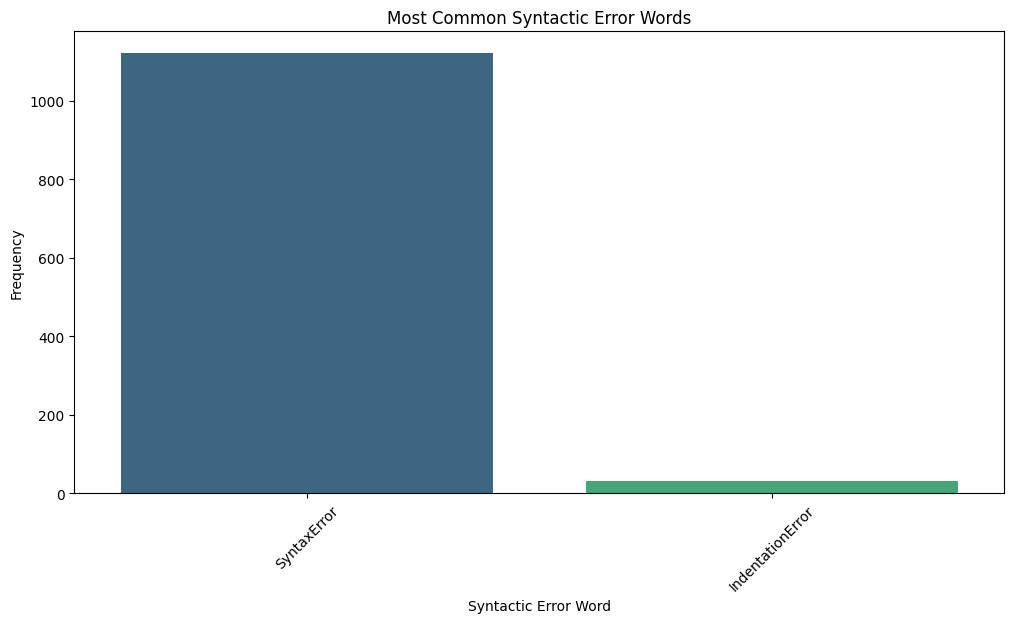

In [15]:
# Plot the top 10 most common syntactic error words
plt.figure(figsize=(12,6))
top_words = df['syntactic_error_word'].value_counts().head(10)
sns.barplot(x=top_words.index, y=top_words.values, palette='viridis')
plt.title('Most Common Syntactic Error Words')
plt.xlabel('Syntactic Error Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


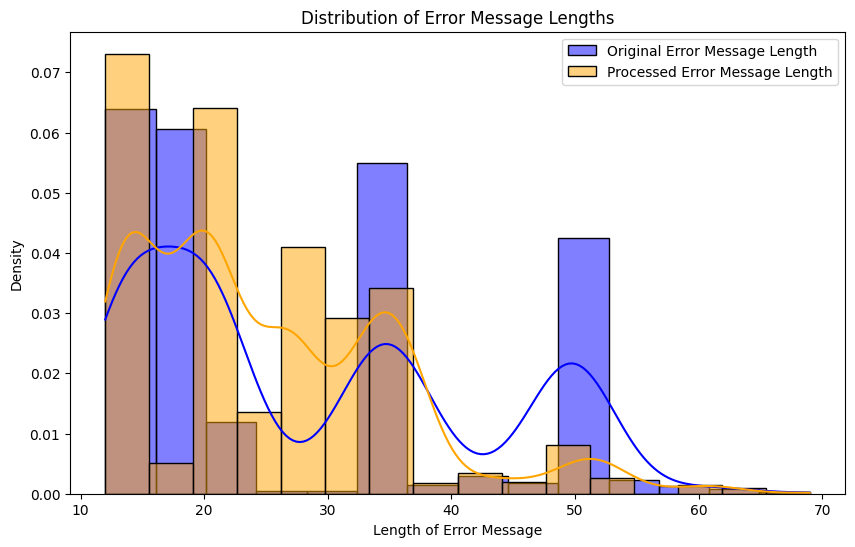

In [20]:
# Compare length of original vs preprocessed error message
df['original_error_length'] = df['syntactic_error_message'].apply(len)
df['processed_error_length'] = df['precessed_error_message'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df['original_error_length'], color='blue', kde=True, label='Original Error Message Length', stat='density')
sns.histplot(df['processed_error_length'], color='orange', kde=True, label='Processed Error Message Length', stat='density')
plt.title('Distribution of Error Message Lengths')
plt.xlabel('Length of Error Message')
plt.ylabel('Density')
plt.legend()
plt.show()


In [21]:
# 1. General Dataset Overview
dataset_overview = pd.DataFrame({
    'Number of Rows': [len(df)],
    'Number of Columns': [len(df.columns)],
    'Column Names': [df.columns.tolist()],
    'Data Types': [df.dtypes.tolist()]
})

# Display general dataset overview
print("General Dataset Overview:")
print(dataset_overview)
print("\n")

# 2. Descriptive Statistics for Numerical Columns
numerical_stats = df.describe().T
numerical_stats['missing'] = df.isnull().sum()  # Add missing value count
numerical_stats['unique'] = df.nunique()       # Add unique value count for each column
numerical_stats = numerical_stats[['count', 'unique', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'missing']]

# Display descriptive stats for numerical columns
print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)
print("\n")

General Dataset Overview:
   Number of Rows  Number of Columns  \
0            1152                 11   

                                        Column Names  \
0  [file_hash, syntactic_error_word, syntactic_er...   

                                          Data Types  
0  [object, object, object, object, object, int64...  


Descriptive Statistics for Numerical Columns:
                         count  unique        mean         std   min   25%  \
error_line_number       1152.0     176  147.290799  173.633585   6.0  47.0   
original_error_length   1152.0      25   28.213542   13.632621  12.0  14.0   
processed_error_length  1152.0      24   24.970486   10.493430  12.0  14.0   

                         50%    75%     max  missing  
error_line_number       74.0  218.0  2183.0        0  
original_error_length   20.0   36.0    69.0        0  
processed_error_length  20.0   33.0    69.0        0  


